# Crime Analytics: Visualization of Incident Reports

## Objective:
This document analyzes the Summer 2014 San Francisco Police Incident Report Dataset.  Specifically, this document examines how police incident reports vary by time of day. This document aims to visualize the data to better understand how and why the incident frequency varies by time of day.

## Pre-Processing Data:

### Importing Data:
The data is imported as a pandas dataframe under the variable name sanFran.  The first 4 lines of data are printed out below:

In [1]:
import pandas
import numpy as np
sanFran = pandas.read_csv("sanfrancisco_incidents_summer_2014.csv")
print(sanFran.head())

   IncidntNum       Category                      Descript DayOfWeek  \
0   140734311          ARSON            ARSON OF A VEHICLE    Sunday   
1   140736317   NON-CRIMINAL                 LOST PROPERTY    Sunday   
2   146177923  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO    Sunday   
3   146177531  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO    Sunday   
4   140734220   NON-CRIMINAL                FOUND PROPERTY    Sunday   

         Date   Time PdDistrict Resolution                    Address  \
0  08/31/2014  23:50    BAYVIEW       NONE  LOOMIS ST / INDUSTRIAL ST   
1  08/31/2014  23:45    MISSION       NONE     400 Block of CASTRO ST   
2  08/31/2014  23:30   SOUTHERN       NONE   1000 Block of MISSION ST   
3  08/31/2014  23:30   RICHMOND       NONE        FULTON ST / 26TH AV   
4  08/31/2014  23:23   RICHMOND       NONE   800 Block of LA PLAYA ST   

            X          Y                               Location  \
0 -122.405647  37.738322  (37.7383221869053, -122.40564699456

### Parsing Date and Time:
The date and time are parsed into a datetime object.  A new column is added to the dataset, 'Hour'. This new column will allow the data to be grouped by time of day.  Observe the new 'Hour' column below:

In [2]:
from datetime import datetime
# Combine time and date
sanFran['dateTime'] = sanFran['Date'] + ' ' + sanFran['Time']
# Parse date time string into datetime object
sanFran['dateTime'] = sanFran['dateTime'].apply(lambda x: datetime.strptime(str(x),'%m/%d/%Y %H:%M'))
# Create a new 'Hour' Column
sanFran['Hour'] = sanFran['dateTime'].apply(lambda x: x.hour)
print(sanFran['Hour'])

0        23
1        23
2        23
3        23
4        23
5        23
6        23
7        23
8        23
9        23
10       23
11       23
12       23
13       23
14       23
15       22
16       22
17       22
18       22
19       22
20       22
21       22
22       22
23       22
24       22
25       22
26       22
27       22
28       22
29       22
         ..
28963     1
28964     1
28965     0
28966     0
28967     0
28968     0
28969     0
28970     0
28971     0
28972     0
28973     0
28974     0
28975     0
28976     0
28977     0
28978     0
28979     0
28980     0
28981     0
28982     0
28983     0
28984     0
28985     0
28986     0
28987     0
28988     0
28989     0
28990     0
28991     0
28992     0
Name: Hour, dtype: int64


### Changing Schema and Initializing a New Table:
The objective is to visualize how the police incident reports vary by time of day. Not just total incidents, but also how certain categories of incidents vary by time of day.  This requires a new schema that will allow easy access to this information.  A 2D array, HourCat, will store incident frequency for a given time of day and incident category.  This array is initialized and the first 5 rows are shown below:

In [3]:
# Initialize hour vs category schema

# Create a list of all hours
hour = sanFran['Hour'].unique()
# Sort list ascending = true
hour = np.sort(hour)

# Create a list of all Categories
category = sanFran['Category'].unique()

# Create a new array with hour as rows, category as columns and initialize as 0
HourCat = pandas.DataFrame(index=hour, columns=category).fillna(0)

print(HourCat.head())

   ARSON  NON-CRIMINAL  LARCENY/THEFT  DRUG/NARCOTIC  \
0      0             0              0              0   
1      0             0              0              0   
2      0             0              0              0   
3      0             0              0              0   
4      0             0              0              0   

   DRIVING UNDER THE INFLUENCE  OTHER OFFENSES  TRESPASS  VEHICLE THEFT  \
0                            0               0         0              0   
1                            0               0         0              0   
2                            0               0         0              0   
3                            0               0         0              0   
4                            0               0         0              0   

   ASSAULT  FRAUD   ...     EMBEZZLEMENT  BURGLARY  SUICIDE  VANDALISM  \
0        0      0   ...                0         0        0          0   
1        0      0   ...                0         0        0     

### Grouping the Data and Populating New Table:
The incident frequency for a given time of day and incident category must be determined and entered into the HourCat array.  This is done by grouping by time of day, using hour, and then sub-grouping the result by incident category.  For each sub-group, the incident frequency will be counted and stored in the HourCat array.  The first 4 lines of the populated HourCat array are shown below:

In [4]:
# Group data by 'hour' 
groupedHour = sanFran.groupby(by='Hour')
# loop through each hour sub-group
for h,groupHour in groupedHour:
    # Group sub-group by 'Category'
    groupedHourCat = groupHour.groupby(by = 'Category')
    # loop through each category sub-sub-group
    for cat, groupHourCat in groupedHourCat:
        # count occurances in sub-sub-group and save in HourCat array
        HourCat.loc[h,cat] = len(groupHourCat)

print(HourCat.head())

   ARSON  NON-CRIMINAL  LARCENY/THEFT  DRUG/NARCOTIC  \
0      5           144            354             56   
1      2            72            230             30   
2      1            59            143             31   
3      5            36             88             24   
4      4            21             65              3   

   DRIVING UNDER THE INFLUENCE  OTHER OFFENSES  TRESPASS  VEHICLE THEFT  \
0                            9             262         8             66   
1                           17             106         7             51   
2                            8              89        12             36   
3                            5              54         9             24   
4                            3              23         5             19   

   ASSAULT  FRAUD   ...     EMBEZZLEMENT  BURGLARY  SUICIDE  VANDALISM  \
0      169     25   ...                0         0        1          1   
1      115     10   ...                0         1        1     

### Sub-Group Summary Statistics:
Several statistics of interest were added to the HourCat array.  These summary statistics are shown below:

In [5]:
# Hour Total
HourCat['Hour Total'] = HourCat.iloc[0:24,:].sum(axis=1)
# Category Total
HourCat.loc['total',:] = HourCat.iloc[0:24,:].sum(axis=0)
# Category Mean
HourCat.loc['mean',:] = HourCat.iloc[0:24,:].mean(axis=0)
# Category Standard Deviation
HourCat.loc['std',:] = HourCat.iloc[0:24,:].std(axis=0)
# Category Standard Deviation/Category Mean
HourCat.loc['stdNorm',:] = HourCat.loc['std',:]/HourCat.loc['mean',:]
print(HourCat.tail())

             ARSON  NON-CRIMINAL  LARCENY/THEFT  DRUG/NARCOTIC  \
23        5.000000    107.000000     462.000000      58.000000   
total    63.000000   3023.000000    9466.000000    1345.000000   
mean      2.625000    125.958333     394.416667      56.041667   
std       2.355613     59.457313     224.043070      33.503380   
stdNorm   0.897376      0.472040       0.568037       0.597830   

         DRIVING UNDER THE INFLUENCE  OTHER OFFENSES    TRESPASS  \
23                         11.000000      178.000000   19.000000   
total                     100.000000     3567.000000  281.000000   
mean                        4.166667      148.625000   11.708333   
std                         4.449393       67.976219    4.768366   
stdNorm                     1.067854        0.457367    0.407263   

         VEHICLE THEFT      ASSAULT       FRAUD      ...       BURGLARY  \
23          137.000000   146.000000    9.000000      ...       0.000000   
total      1966.000000  2882.000000  242.000

### Select and Arrange Data for Plotting:
The required data for plotting is selected from HourCat and stored in PlotData

In [6]:
# Take All
plotData = HourCat

# Sort by category total, largest first
plotData = plotData.T.sort(columns='total',ascending = 0).T

# Select most frequent 9 categories
plotData = plotData.iloc[:,:9]

# Sort by category total, smallest first
plotData = plotData.T.sort(columns='total',ascending = 1).T

# Drop data not being plotted and re-assign total column 
plotData = plotData.iloc[:-4,:]
total = plotData['Hour Total']
plotData = plotData.drop('Hour Total', 1)
plotData = plotData.drop('OTHER OFFENSES', 1)

/home/omar-u64/anaconda3/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/omar-u64/anaconda3/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### Plot Data:
The total incident frequencies are plotted as a function of time of day, given by the thin black line.  The categorical composition of this black line is also shown below using a stack plot.

/home/omar-u64/anaconda3/envs/dato-env/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


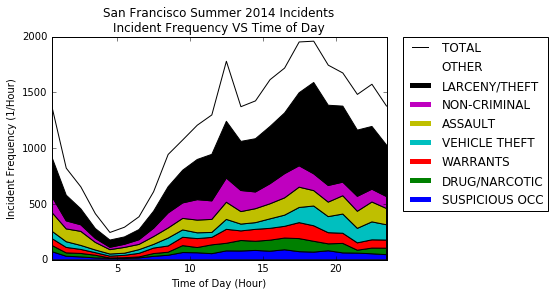

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# x values
index  = np.arange(len(plotData.index))
x = index + 0.5

# blank for plotting blank sets (workaround hack because legend feature doesn't work for stackplot)
blank = []

# Define plotting colors
colors = ['b','g','r','c','y','m','k']

# Plot total
plt.plot(x,total,label = 'TOTAL',color = 'k',linewidth = 1)

# Label for Other in legend
plt.plot(blank,blank,label = 'OTHER',color = 'w',linewidth = 5)

# Number of Categories to Plot
numCat = len(plotData.columns)

# Loop through Each Category and plot it
for index in range(0,numCat):
    # Initialize y
    if index == 0:
        y = plotData.iloc[:,index]
    else:
        # Stack next category onto y
        y = np.row_stack((y, plotData.iloc[:,index]))
    # label for legend (workaround hack because legend feature doesn't work for stackplot)
    plt.plot(blank,blank,label = plotData.columns[numCat-index-1],color = colors[numCat-index-1],linewidth = 5)

# Set x axis range    
plt.xlim([0.5,23.5])
# title and labels
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Incident Frequency (1/Hour)')
plt.title('San Francisco Summer 2014 Incidents\nIncident Frequency VS Time of Day')
# add legend and data
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plot stackplot
plt.stackplot(x,y, colors = colors)

### Discussion of the First Plot:
The total incident frequency strongly depends on time of day.  The fewest number of incidents are recorded in the early hours of the morning (4-5am).  At this time, incidents in all categories appear to be at their minimum. 
3 local maximums are also evident on the total number of incidents curve.  These maximums roughly correspond to 12h, 18h and 22h.  Theft incidents are a significant proportion of the total number of incidents.  Theft incidents will be examined in isolation to better understand the root cause of the time of day dependency.

### Select the Larceny/Theft Data
The theft data will be plotted separately to better visualize its dependency on time of day.  

In [8]:
larceny = sanFran[sanFran['Category'] == 'LARCENY/THEFT']
vehicleTheft = sanFran[sanFran['Category'] == 'VEHICLE THEFT']

### Sub Categorizing Data:
The larceny data will be further divided into four categories, based on its description. The set of larceny descriptions are printed below. From the descriptions below, the larceny data can be divided into three categories, 'Grand Theft', 'Petty Theft' and 'Other'.  The function below, catTheft, will categorize the larceny data in this manner, and store these categories under a new column 'SubCat'.  The vehicleTheft data is its own group, 'Vehicle Theft, and concatenated into the larceny variable.

In [9]:
np.sort(larceny['Descript'].unique())

array(['ATTEMPTED AUTO STRIP', 'ATTEMPTED GRAND THEFT FROM PERSON',
       'ATTEMPTED PETTY THEFT OF PROPERTY', 'ATTEMPTED SHOPLIFTING',
       'ATTEMPTED THEFT FROM A BUILDING',
       'ATTEMPTED THEFT FROM LOCKED VEHICLE',
       'ATTEMPTED THEFT FROM UNLOCKED VEHICLE',
       'ATTEMPTED THEFT OF A BICYCLE',
       'EMBEZZLEMENT FROM DEPENDENT OR ELDER ADULT BY CARETAKER',
       'GRAND THEFT AUTO STRIP', 'GRAND THEFT BICYCLE',
       'GRAND THEFT BY PROSTITUTE', 'GRAND THEFT COIN OPERATED MACHINE',
       'GRAND THEFT FROM A BUILDING', 'GRAND THEFT FROM LOCKED AUTO',
       'GRAND THEFT FROM PERSON', 'GRAND THEFT FROM UNLOCKED AUTO',
       'GRAND THEFT OF PROPERTY', 'GRAND THEFT PICKPOCKET',
       'GRAND THEFT PURSESNATCH', 'GRAND THEFT SHOPLIFTING',
       'PETTY THEFT AUTO STRIP', 'PETTY THEFT BICYCLE',
       'PETTY THEFT COIN OPERATED MACHINE', 'PETTY THEFT FROM A BUILDING',
       'PETTY THEFT FROM LOCKED AUTO', 'PETTY THEFT FROM UNLOCKED AUTO',
       'PETTY THEFT MOTORCYCLE

In [10]:
# function to categorize larceny
def catTheft(string):
    if "PETTY THEFT" in string:
        return 'Petty Theft'
    elif "GRAND THEFT" in string:
        return 'Grand Theft'
    else:
        return 'Other'

In [11]:
# Group and concat.
larceny['SubCat'] = larceny['Descript'].apply(catTheft)
vehicleTheft['SubCat'] = 'Vehicle Theft'

larceny = larceny.append(vehicleTheft)

/home/omar-u64/anaconda3/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/omar-u64/anaconda3/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Changing Schema and Populating Table
As performed previously, a new schema is implemented, and the table is populated.  This time, the larceny data is grouped by sub-category rather than category.  The populated table is shown below.

In [12]:
larcenyGroupedHour = larceny.groupby(by='Hour')
hour = larceny['Hour'].unique()
hour = np.sort(hour)
print(hour)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [13]:
# Initialize hour vs category schema
columns = larceny['SubCat'].unique()
larcenyHourCat = pandas.DataFrame(index=hour, columns=columns).fillna(0)
#print(larcenyHourCat.head())

for h,larcenyGroupHour in larcenyGroupedHour:
    larcenyGroupedHourCat = larcenyGroupHour.groupby(by = 'SubCat')
    for cat, larcenyGroupHourCat in larcenyGroupedHourCat:
        larcenyHourCat.loc[h,cat] = len(larcenyGroupHourCat)
        
larcenyHourCat['Hour Total'] = larcenyHourCat.iloc[0:24,:].sum(axis=1)
larcenyHourCat.loc['total',:] = larcenyHourCat.iloc[0:24,:].sum(axis=0)

print(larcenyHourCat.head())
print(larcenyHourCat.tail())

   Grand Theft  Petty Theft  Other  Vehicle Theft  Hour Total
0          213          131     10             66         420
1          144           81      5             51         281
2           96           40      7             36         179
3           53           31      4             24         112
4           39           24      2             19          84
       Grand Theft  Petty Theft  Other  Vehicle Theft  Hour Total
20             481          194      6            172         853
21             412          173      8            130         723
22             383          163     16            161         723
23             319          136      7            137         599
total         5961         3286    219           1966       11432


### Select and Arrange Data for Plotting:
The required data for plotting are selected and stored in PlotData

In [14]:
# Select all data
plotData = larcenyHourCat
# Sort plotData descending 
plotData = plotData.T.sort(columns='total',ascending=0).T
# Drop Sub-Cat Total Column
plotData = plotData.iloc[:-1,:]

print(plotData)

    Hour Total  Grand Theft  Petty Theft  Vehicle Theft  Other
0          420          213          131             66     10
1          281          144           81             51      5
2          179           96           40             36      7
3          112           53           31             24      4
4           84           39           24             19      2
5           85           38           28             19      0
6          124           55           34             33      2
7          186           94           54             33      5
8          306          136           90             71      9
9          359          165          120             66      8
10         412          198          151             52     11
11         461          235          166             44     16
12         597          296          195             89     17
13         501          262          166             61     12
14         537          283          181             60

/home/omar-u64/anaconda3/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### Plot Larceny Data:
The total number of larceny incidents are plotted as a function of time of day, given by the thin black line.  Additionally, the total number of larceny incidents for each sub-category as a function of time of day are also plotted.

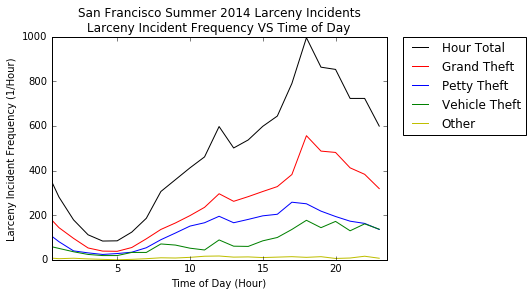

In [15]:
x_axis = plotData.index
index  = np.arange(len(x_axis))
x = index
plt.clf()

colors = ['k','r','b','g','y']

for index in range(0,5):

    plt.plot(x,plotData.iloc[:,index],label = plotData.columns[index],color = colors[index],linewidth = 1)

    
# Set x axis range    
plt.xlim([0.5,23.5])
# title and labels
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Larceny Incident Frequency (1/Hour)')
plt.title('San Francisco Summer 2014 Larceny Incidents\nLarceny Incident Frequency VS Time of Day')
# add legend and data
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Discussion of the Second Plot:
The total larceny incident frequencies have two local maximums; the first at around 12h, and the second at around 18h.  The time at which these peaks occur closely lines up with that when people leave from work.  This will be examined further by comparing weekend larceny and weekday larceny.

### Comparing Weekend VS Weekday Data:
The procedure to sub-divide larceny data into sub-categories, will be applied again, but instead the subcategory will be 'Workday'.  The data will be categorized as either 'Weekend' or 'Weekday.  The new schema structure is initialized, the data is grouped, and sub-grouped, and the new array populated and printed out below.  

In [16]:
def CatWorkWeek(string):
    if 'Saturday' in string:
        return 'Weekend'
    elif 'Sunday' in string:
        return 'Weekend'
    else:
        return 'Weekday'

In [17]:
larceny['Workday'] = larceny['DayOfWeek'].apply(CatWorkWeek)

In [18]:
larcenyGroupedHour = larceny.groupby(by='Hour')
hour = larceny['Hour'].unique()
hour = np.sort(hour)
print(hour)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [19]:
# Initialize hour vs category schema
columns = larceny['Workday'].unique()
larcenyHourCat = pandas.DataFrame(index=hour, columns=columns).fillna(0)
#print(larcenyHourCat.head())

for h,larcenyGroupHour in larcenyGroupedHour:
    larcenyGroupedHourCat = larcenyGroupHour.groupby(by = 'Workday')
    for cat, larcenyGroupHourCat in larcenyGroupedHourCat:
        larcenyHourCat.loc[h,cat] = len(larcenyGroupHourCat)
        
larcenyHourCat['Hour Total'] = larcenyHourCat.iloc[0:24,:].sum(axis=1)
larcenyHourCat.loc['total',:] = larcenyHourCat.iloc[0:24,:].sum(axis=0)

print(larcenyHourCat.head())
print(larcenyHourCat.tail())

   Weekend  Weekday  Hour Total
0      179      241         420
1      140      141         281
2       85       94         179
3       51       61         112
4       29       55          84
       Weekend  Weekday  Hour Total
20         241      612         853
21         238      485         723
22         245      478         723
23         216      383         599
total     3683     7749       11432


# Plotting the Data:
The required data for plotting is selected.  The total, weekday and weekend incident frequencies are plotted as a function of time of day.

In [20]:
# Select all data
plotData = larcenyHourCat
# Sort plotData descending 
plotData = plotData.T.sort(columns='total',ascending=0).T
# Drop Sub-Cat Total Column
plotData = plotData.iloc[:-1,:]

print(plotData)

    Hour Total  Weekday  Weekend
0          420      241      179
1          281      141      140
2          179       94       85
3          112       61       51
4           84       55       29
5           85       63       22
6          124       96       28
7          186      145       41
8          306      236       70
9          359      266       93
10         412      278      134
11         461      315      146
12         597      398      199
13         501      337      164
14         537      361      176
15         598      369      229
16         644      418      226
17         790      540      250
18         995      731      264
19         863      646      217
20         853      612      241
21         723      485      238
22         723      478      245
23         599      383      216


/home/omar-u64/anaconda3/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


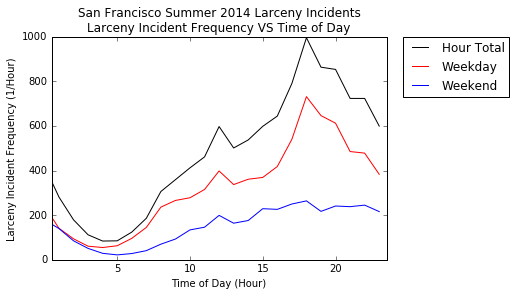

In [21]:
x_axis = plotData.index
index  = np.arange(len(x_axis))
x = index
plt.clf()

colors = ['k','r','b','g','y']

for index in range(0,3):

    plt.plot(x,plotData.iloc[:,index],label = plotData.columns[index],color = colors[index],linewidth = 1)

    
# Set x axis range    
plt.xlim([0.5,23.5])
# title and labels
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Larceny Incident Frequency (1/Hour)')
plt.title('San Francisco Summer 2014 Larceny Incidents\nLarceny Incident Frequency VS Time of Day')
# add legend and data
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Discussion of the Third Plot:
This plot clearly shows that the 18h maximum is owing to the weekday data.  This plot provides strong evidence that the 18h peak is somehow related to when most people leave their workplace.  

This spike in larceny reports immediately after people leave work could be attributed to the fact that people only realize and report an incident when they observe the incident.  All larceny that occurs while the victim is at work will only be observed and reported once they leave their workplace, hence the spike immediately after work.  This is just a theory, and no data has been shown to support it.  An alternate theory is that these times of day are when it's most convenient for a victim to report crimes. Another alternate theory might be that the workers are leaving their jobs and committing larceny on their way home.  More analysis is required before one of these theories can be favored over the others.

### Conclusion:
The number of incident reports recorded depend heavily on time of day.  The peak of total incident reports recorded occurs at 6 PM.  A majority of these reports are owing to larceny incidents.  Larceny reports are frequently recorded immediately after a majority of the population have left work, 6pm on weekdays.  More analysis is required to determine why that is.